In [1]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

bc_dataset = fetch_ucirepo(id=17)

In [6]:
import pandas as pd

X = bc_dataset.data.features
y = bc_dataset.data.targets
bc_df = pd.concat([X, y], axis=1)

In [7]:
bc_df

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,M
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,M
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,M


In [21]:
bc_df['Diagnosis'] = bc_df['Diagnosis'].replace({'M': 0, 'B': 1}) #cannot use letters to train data so numbers it is

In [29]:
from sklearn.model_selection import train_test_split

X = bc_df.drop('Diagnosis', axis=1)
y = bc_df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #stratify maintains a regular distribution amongst training and test data (positive and negative diagnosis are evenly split)

In [23]:
y

,Diagnosis
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [24]:
X #all other values see numerical here so no issue

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
X.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [15]:
display(X_train_scaled.describe())

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,...,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02,4.830000e+02
mean,-1.360770e-16,5.810857e-16,-9.194394e-17,-1.213660e-16,4.799473e-16,-1.057355e-16,2.022767e-17,-1.838879e-16,2.831873e-16,-2.942206e-16,...,-1.029772e-16,-3.282399e-16,-9.194394e-17,8.458842e-17,-4.725918e-16,1.232049e-16,8.458842e-17,-8.091066e-17,-3.309982e-16,4.854640e-16
std,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,...,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00,1.001037e+00
min,-1.839210e+00,-2.063071e+00,-1.825793e+00,-1.378856e+00,-3.130182e+00,-1.626428e+00,-1.127890e+00,-1.270396e+00,-2.729035e+00,-1.798271e+00,...,-1.580973e+00,-2.127574e+00,-1.580205e+00,-1.156668e+00,-2.668345e+00,-1.431008e+00,-1.303308e+00,-1.762898e+00,-2.153757e+00,-1.563107e+00
25%,-7.033193e-01,-7.299845e-01,-7.035049e-01,-6.764045e-01,-6.971303e-01,-7.415750e-01,-7.524978e-01,-7.375011e-01,-7.040835e-01,-7.272133e-01,...,-6.792260e-01,-7.507667e-01,-6.979152e-01,-6.484481e-01,-6.922067e-01,-6.737815e-01,-7.359164e-01,-7.607713e-01,-6.802236e-01,-6.951823e-01
50%,-2.196294e-01,-1.169255e-01,-2.446301e-01,-2.974449e-01,-4.599200e-02,-1.828851e-01,-3.236592e-01,-3.698266e-01,-7.377656e-02,-1.781836e-01,...,-2.802412e-01,-5.594421e-02,-2.950885e-01,-3.483706e-01,-4.407852e-02,-2.467436e-01,-2.011249e-01,-2.275586e-01,-1.207968e-01,-2.235188e-01
75%,5.307283e-01,5.478926e-01,5.027390e-01,3.935741e-01,6.250719e-01,4.838617e-01,5.503945e-01,6.383049e-01,5.420406e-01,4.947760e-01,...,5.290983e-01,6.629483e-01,5.510410e-01,3.492199e-01,5.888252e-01,5.210493e-01,5.096131e-01,7.161072e-01,4.612006e-01,4.107135e-01
max,3.953437e+00,4.585110e+00,3.959733e+00,5.199939e+00,4.752506e+00,4.559480e+00,4.290354e+00,3.931862e+00,4.443423e+00,4.776239e+00,...,4.075515e+00,3.817731e+00,4.274249e+00,5.881052e+00,3.918638e+00,5.013388e+00,4.699012e+00,2.697314e+00,6.024838e+00,6.589933e+00


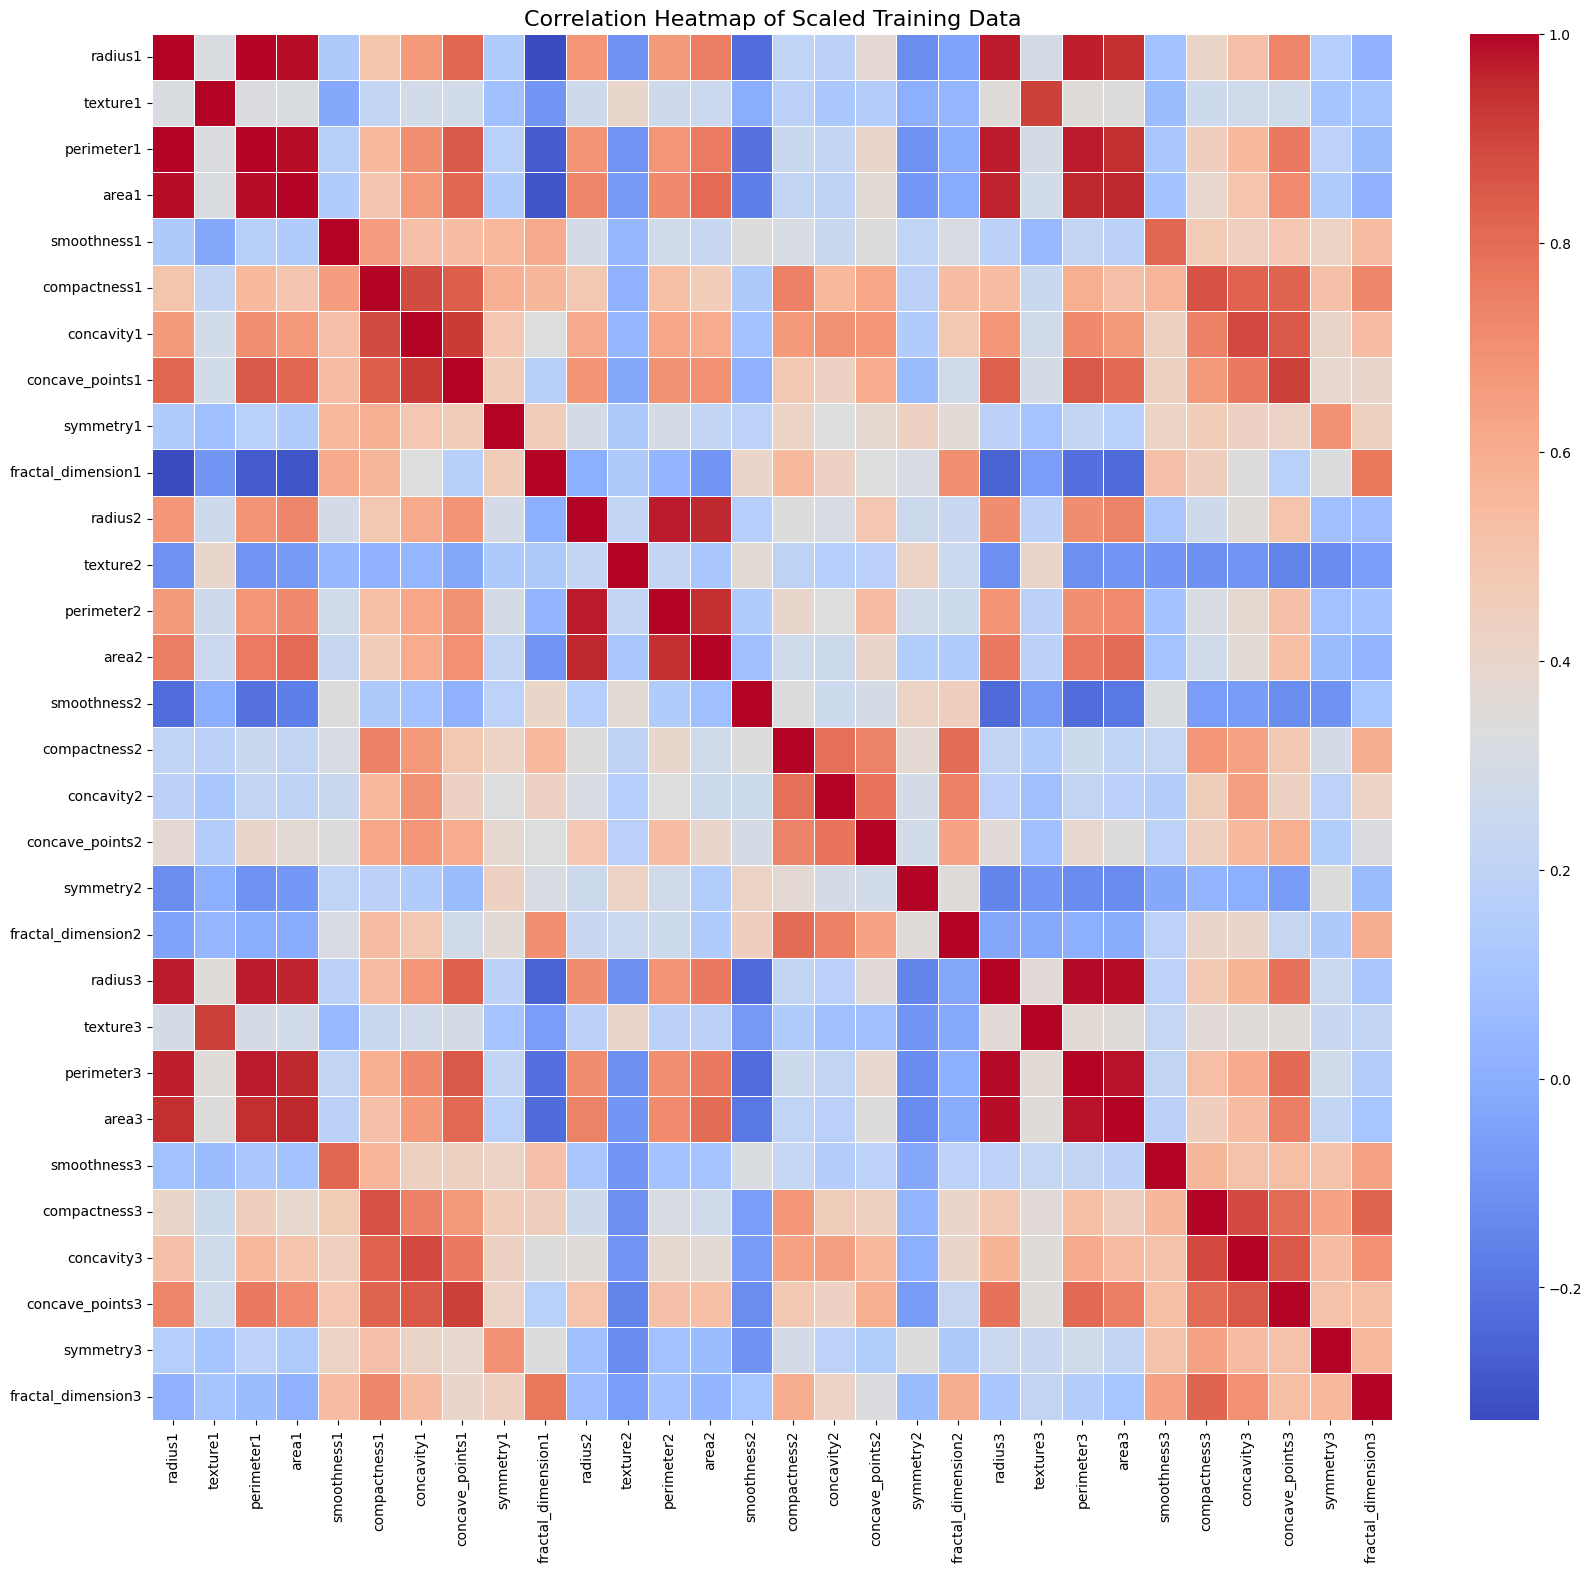

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


corr_matrix = X_train_scaled.corr()


plt.figure(figsize=(20, 18))


sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Scaled Training Data', fontsize=16)
plt.show()

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)


y_train_pred = log_reg_model.predict(X_train_scaled)
y_test_pred = log_reg_model.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

print(f"Logistic Regression Model Performance")
print(f"Training Error:\t\t\t{train_error:.4f}")
print(f"Test Error:     \t\t{test_error:.4f}")
print(f"Generalization Gap: \t{abs(train_error - test_error):.4f}\n")

train_precision = precision_score(y_train, y_train_pred, average='binary', pos_label=0)
train_recall = recall_score(y_train, y_train_pred, average='binary', pos_label=0)
train_f1 = f1_score(y_train, y_train_pred, average='binary', pos_label=0)

print(f"\nTraining Set Metrics")
print(f"Accuracy:  {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall:    {train_recall:.4f}")
print(f"F1-Score:  {train_f1:.4f}")



accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='binary', pos_label=0)
recall = recall_score(y_test, y_test_pred, average='binary', pos_label=0)
f1 = f1_score(y_test, y_test_pred, average='binary', pos_label=0)

print(f"\nTest Set Metrics")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")

conf_matrix_df = pd.DataFrame(
    conf_matrix,
    index=['Actual Malignant (0)', 'Actual Benign (1)'],
    columns=['Predicted Malignant (0)', 'Predicted Benign (1)']
)

print("\nConfusion Matrix")
display(conf_matrix_df)

Logistic Regression Model Performance
Training Error:			0.0132
Test Error:     		0.0614
Generalization Gap: 	0.0482


Training Set Metrics
Accuracy:  0.9868
Precision: 0.9883
Recall:    0.9769
F1-Score:  0.9826

Test Set Metrics
Accuracy:  0.9386
Precision: 0.9211
Recall:    0.8974
F1-Score:  0.9091

Confusion Matrix


,Predicted Malignant (0),Predicted Benign (1)
Actual Malignant (0),35,4
Actual Benign (1),3,72


In [42]:
from sklearn.tree import DecisionTreeClassifier


print("Decision Tree Classifier (Non-linear Model)\n\n")


dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_train_pred_dt = dt_model.predict(X_train_scaled)
y_test_pred_dt = dt_model.predict(X_test_scaled)

train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

train_error_dt = 1 - train_accuracy_dt
test_error_dt = 1 - test_accuracy_dt

print(f"Decision Tree Model Performance")
print(f"Training Error:\t\t\t{train_error_dt:.4f}")
print(f"Test Error:     \t\t{test_error_dt:.4f}")
print(f"Generalization Gap: \t{abs(train_error_dt - test_error_dt):.4f}\n")

train_precision_dt = precision_score(y_train, y_train_pred_dt, average='binary', pos_label=0)
train_recall_dt = recall_score(y_train, y_train_pred_dt, average='binary', pos_label=0)
train_f1_dt = f1_score(y_train, y_train_pred_dt, average='binary', pos_label=0)

print(f"\nTraining Set Metrics")
print(f"Accuracy:  {train_accuracy_dt:.4f}")
print(f"Precision: {train_precision_dt:.4f}")
print(f"Recall:    {train_recall_dt:.4f}")
print(f"F1-Score:  {train_f1_dt:.4f}")



accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
precision_dt = precision_score(y_test, y_test_pred_dt, average='binary', pos_label=0)
recall_dt = recall_score(y_test, y_test_pred_dt, average='binary', pos_label=0)
f1_dt = f1_score(y_test, y_test_pred_dt, average='binary', pos_label=0)

print(f"\nTest Set Metrics")
print(f"Accuracy:  {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall:    {recall_dt:.4f}")
print(f"F1-Score:  {f1_dt:.4f}")

conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt)


conf_matrix_df_dt = pd.DataFrame(
    conf_matrix_dt,
    index=['Actual Malignant (0)', 'Actual Benign (1)'],
    columns=['Predicted Malignant (0)', 'Predicted Benign (1)']
)

print("\nConfusion Matrix")
display(conf_matrix_df_dt)

Decision Tree Classifier (Non-linear Model) Performance


Decision Tree Model Performance
Training Error:			0.0000
Test Error:     		0.1316
Generalization Gap: 	0.1316

The generalization gap indicates the difference between the training error and the test error. A small gap suggests the model is generalizing well, while a large gap might indicate overfitting or underfitting.

Training Set Metrics
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000

Test Set Metrics
Accuracy:  0.8684
Precision: 0.7500
Recall:    0.9231
F1-Score:  0.8276

Confusion Matrix


,Predicted Malignant (0),Predicted Benign (1)
Actual Malignant (0),36,3
Actual Benign (1),12,63


In above processing tasks and model analysis as well, we can see that the count of attributes contributing towards our classification result is high. The dataset contains attributes like radius, texture, perimeter, area, smoothness, compactness, concavity, concave_points, symmetry & fractal dimension. Heat Map showcases strong correlation between radius, perimeter and area. These three attributes contribute similarly to the model. Have such attributes is known as a condition called 'multicollinearity' which makes linear models unstable due to large matrix values.
The amount of attributes into consideration indicate a clear sign of overfitting for the decision tree model. It is seen in the training and test metrics for the decision tree classifier. The training accuracy is 1 (idealistic, all classifications were 100% accurate) which indicates that the model can correctly classify any case thrown at it but the test metrics show room for error. This means, that the model's training accuracy is misleading as it is highly fine tuned to the given data and cannot work well with unknown values.